# Tree Methods Consulting Project 

You've been hired by a dog food company to try to predict why some batches of their dog food are spoiling much quicker than intended! Unfortunately this Dog Food company hasn't upgraded to the latest machinery, meaning that the amounts of the five preservative chemicals they are using can vary a lot, but which is the chemical that has the strongest effect? The dog food company first mixes up a batch of preservative that contains 4 different preservative chemicals (A,B,C,D) and then is completed with a "filler" chemical. The food scientists beelive one of the A,B,C, or D preservatives is causing the problem, but need your help to figure out which one!
Use Machine Learning with RF to find out which parameter had the most predicitive power, thus finding out which chemical causes the early spoiling! So create a model and then find out how you can decide which chemical is the problem!

* Pres_A : Percentage of preservative A in the mix
* Pres_B : Percentage of preservative B in the mix
* Pres_C : Percentage of preservative C in the mix
* Pres_D : Percentage of preservative D in the mix
* Spoiled: Label indicating whether or not the dog food batch was spoiled.
___

**Think carefully about what this problem is really asking you to solve. While we will use Machine Learning to solve this, it won't be with your typical train/test split workflow. If this confuses you, skip ahead to the solution code along walk-through!**
____

In [18]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spark = SparkSession.builder.appName('tree').getOrCreate()
spark

In [3]:
df = spark.read.csv('dog_food.csv',inferSchema=True,header=True)
df.printSchema()

root
 |-- A: integer (nullable = true)
 |-- B: integer (nullable = true)
 |-- C: double (nullable = true)
 |-- D: integer (nullable = true)
 |-- Spoiled: double (nullable = true)



In [4]:
df.show(5)

+---+---+----+---+-------+
|  A|  B|   C|  D|Spoiled|
+---+---+----+---+-------+
|  4|  2|12.0|  3|    1.0|
|  5|  6|12.0|  7|    1.0|
|  6|  2|13.0|  6|    1.0|
|  4|  2|12.0|  1|    1.0|
|  4|  2|12.0|  3|    1.0|
+---+---+----+---+-------+
only showing top 5 rows



In [5]:
df.count()

490

In [6]:
df.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+
|summary|                 A|                 B|                 C|                 D|            Spoiled|
+-------+------------------+------------------+------------------+------------------+-------------------+
|  count|               490|               490|               490|               490|                490|
|   mean|  5.53469387755102| 5.504081632653061| 9.126530612244897| 5.579591836734694| 0.2857142857142857|
| stddev|2.9515204234399057|2.8537966089662063|2.0555451971054275|2.8548369309982857|0.45221563164613465|
|    min|                 1|                 1|               5.0|                 1|                0.0|
|    max|                10|                10|              14.0|                10|                1.0|
+-------+------------------+------------------+------------------+------------------+-------------------+



In [8]:
df.columns

['A', 'B', 'C', 'D', 'Spoiled']

In [9]:
assembler = VectorAssembler(inputCols=['A','B','C','D'],outputCol='features')
assembler

VectorAssembler_8e9d321ff14a

In [10]:
output = assembler.transform(df)
output.printSchema()

root
 |-- A: integer (nullable = true)
 |-- B: integer (nullable = true)
 |-- C: double (nullable = true)
 |-- D: integer (nullable = true)
 |-- Spoiled: double (nullable = true)
 |-- features: vector (nullable = true)



In [11]:
final_df = output.select('features','Spoiled')
final_df.show()

+-------------------+-------+
|           features|Spoiled|
+-------------------+-------+
| [4.0,2.0,12.0,3.0]|    1.0|
| [5.0,6.0,12.0,7.0]|    1.0|
| [6.0,2.0,13.0,6.0]|    1.0|
| [4.0,2.0,12.0,1.0]|    1.0|
| [4.0,2.0,12.0,3.0]|    1.0|
|[10.0,3.0,13.0,9.0]|    1.0|
| [8.0,5.0,14.0,5.0]|    1.0|
| [5.0,8.0,12.0,8.0]|    1.0|
| [6.0,5.0,12.0,9.0]|    1.0|
| [3.0,3.0,12.0,1.0]|    1.0|
| [9.0,8.0,11.0,3.0]|    1.0|
|[1.0,10.0,12.0,3.0]|    1.0|
|[1.0,5.0,13.0,10.0]|    1.0|
|[2.0,10.0,12.0,6.0]|    1.0|
|[1.0,10.0,11.0,4.0]|    1.0|
| [5.0,3.0,12.0,2.0]|    1.0|
| [4.0,9.0,11.0,8.0]|    1.0|
| [5.0,1.0,11.0,1.0]|    1.0|
|[4.0,9.0,12.0,10.0]|    1.0|
| [5.0,8.0,10.0,9.0]|    1.0|
+-------------------+-------+
only showing top 20 rows



In [12]:
rfc = RandomForestClassifier(labelCol='Spoiled')
rfc

RandomForestClassifier_1e5db818aaf6

In [13]:
rfc_model = rfc.fit(final_df)
rfc_model

RandomForestClassificationModel: uid=RandomForestClassifier_1e5db818aaf6, numTrees=20, numClasses=2, numFeatures=4

In [20]:
list(rfc_model.featureImportances.values)

[0.024006556923017768,
 0.024426063696913615,
 0.9291052584024497,
 0.02246212097761893]

D:\Anaconda\Lib\site-packages\seaborn\_core.py:1462: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


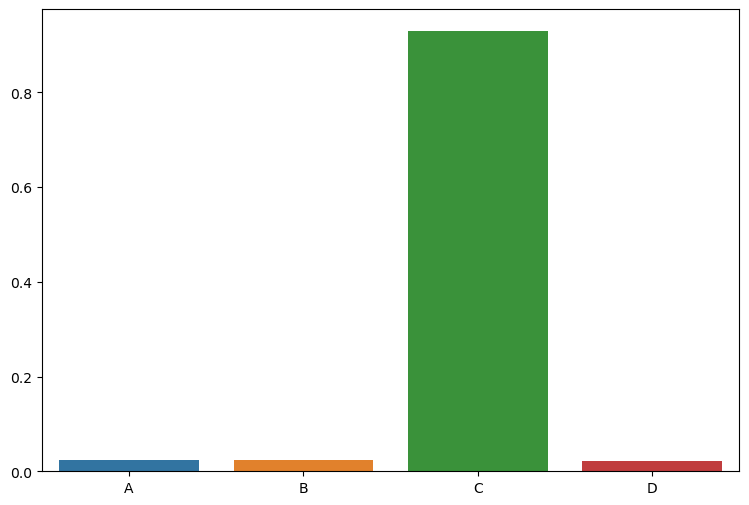

In [21]:
features = ['A','B','C','D']

plt.figure(figsize=(9,6))
sns.barplot(x=features,y=list(rfc_model.featureImportances.values))
plt.show()

Based on the feature importances of the Random Forest Classifier model, we can clearly infer that the preservative C is the chemical which caused the early spoiling of dog food as the predictive power of feature "C" is the highest among all features clearly highlighting its significance in predicting the spoilage of dog food.

# Good Luck!